In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statistics as sts

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report




In [ ]:
df = pd.read_csv('weather.csv')
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31
WindDir3pm,1
WindSpeed9am,7


In [ ]:
print(df.shape)
df.head(10).T

(366, 22)


,0,1,2,3,4,5,6,7,8,9
MinTemp,8.0,14.0,13.7,13.3,7.6,6.2,6.1,8.3,8.8,8.4
MaxTemp,24.3,26.9,23.4,15.5,16.1,16.9,18.2,17.0,19.5,22.8
Rainfall,0.0,3.6,3.6,39.8,2.8,0.0,0.2,0.0,0.0,16.2
Evaporation,3.4,4.4,5.8,7.2,5.6,5.8,4.2,5.6,4.0,5.4
Sunshine,6.3,9.7,3.3,9.1,10.6,8.2,8.4,4.6,4.1,7.7
WindGustDir,NW,ENE,NW,NW,SSE,SE,SE,E,S,E
WindGustSpeed,30.0,39.0,85.0,54.0,50.0,44.0,43.0,41.0,48.0,31.0
WindDir9am,SW,E,N,WNW,SSE,SE,SE,SE,E,S
WindDir3pm,NW,W,NNE,W,ESE,E,ESE,E,ENE,ESE
WindSpeed9am,6.0,4.0,6.0,30.0,20.0,20.0,19.0,11.0,19.0,7.0


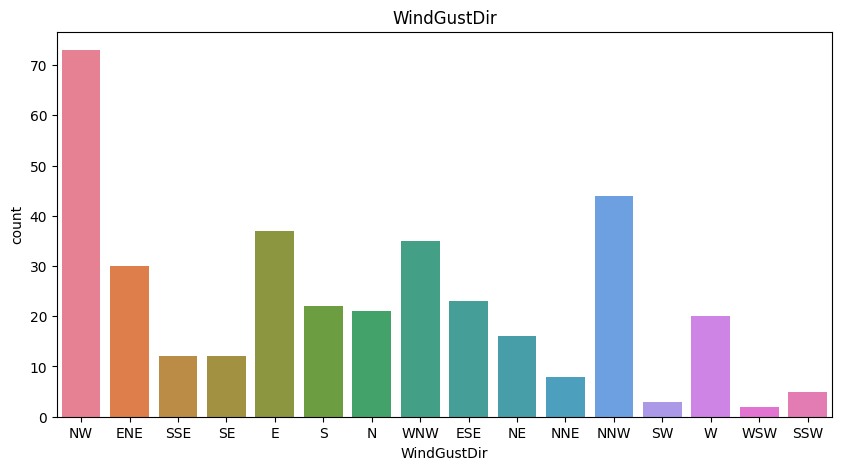

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="WindGustDir", data=df,hue="WindGustDir",legend=False)
plt.title("WindGustDir")
plt.show()

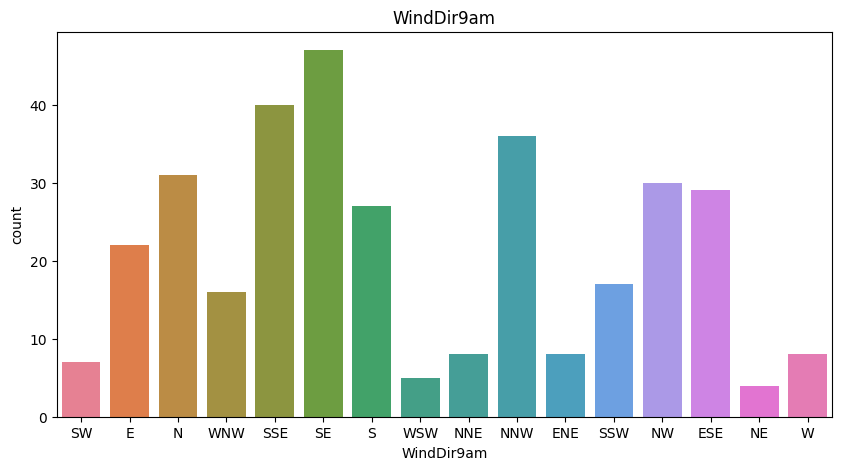

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="WindDir9am", data=df, hue="WindDir9am", legend=False)
plt.title("WindDir9am")
plt.show()

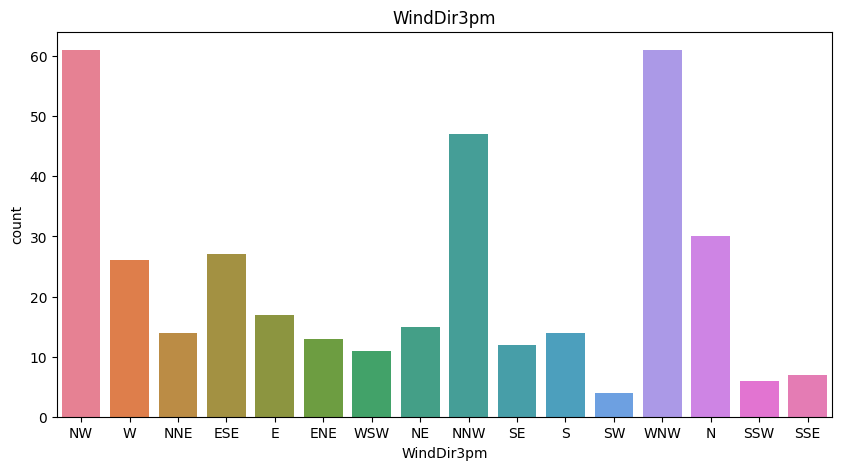

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="WindDir3pm", data=df, hue="WindDir3pm", legend=False)
plt.title("WindDir3pm")
plt.show()

In [ ]:
df['WindGustDir'] = df['WindGustDir'].replace(['NW', 'NNW', 'N', 'NNE', 'NE', 'ENE', 'E', 'ESE',
                                                         'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW'],
                                                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
df['WindGustDir'].value_counts()

,count
WindGustDir,
0.0,73
1.0,44
6.0,37
15.0,35
5.0,30
7.0,23
10.0,22
2.0,21
14.0,20


In [ ]:
df['WindDir9am'] = df['WindDir9am'].replace(['NW', 'NNW', 'N', 'NNE', 'NE', 'ENE', 'E', 'ESE',
                                                         'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW'],
                                                        [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
df['WindDir9am'].value_counts()

,count
WindDir9am,
8.0,47
9.0,40
1.0,36
2.0,31
0.0,30
7.0,29
10.0,27
6.0,22
11.0,17


In [ ]:
df['WindDir3pm'] = df['WindDir3pm'].replace(['NW', 'NNW', 'N', 'NNE', 'NE', 'ENE', 'E', 'ESE',
                                                       'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW'],
                                                      [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
df['WindDir3pm'].value_counts()

,count
WindDir3pm,
0.0,61
15.0,61
1.0,47
2.0,30
7.0,27
14.0,26
6.0,17
4.0,15
3.0,14


In [ ]:
df['RainToday'] = df['RainToday'].replace(["Yes", "No"],[1, 0])
df['RainToday'].value_counts()

,count
RainToday,
0,300
1,66


In [ ]:
df['RainTomorrow'] = df['RainTomorrow'].replace(["Yes", "No"], [1, 0])
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,300
1,66


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    float64
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    float64
 8   WindDir3pm     365 non-null    float64
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [ ]:
df.shape

(366, 22)

In [ ]:
d=df.dropna()
print(d.shape)
loss_data_rate = 1- 328/366
loss_data_rate

(328, 22)


0.10382513661202186

In [ ]:
corrmat = d.corr()
corrmat

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,1.000000,0.745911,0.197339,0.634720,0.007730,0.016675,0.190596,-0.054658,0.066112,0.058319,...,-0.013897,-0.502352,-0.503255,0.211640,0.125914,0.910805,0.716051,0.213284,0.251519,0.246593
MaxTemp,0.745911,1.000000,-0.077263,0.673162,0.444863,-0.082626,0.070911,-0.025514,-0.029662,-0.296485,...,-0.520412,-0.268054,-0.367040,-0.187416,-0.144976,0.869609,0.988925,-0.083483,0.058638,0.066585
Rainfall,0.197339,-0.077263,1.000000,-0.011767,-0.158062,-0.013111,0.099442,-0.014832,0.100946,0.238705,...,0.287244,-0.348731,-0.263710,0.172610,0.134894,0.071893,-0.089740,0.676763,0.101909,0.147208
Evaporation,0.634720,0.673162,-0.011767,1.000000,0.310124,-0.021059,0.258050,-0.067523,-0.033655,0.006259,...,-0.374532,-0.363936,-0.380702,-0.114261,-0.111387,0.688749,0.655896,-0.044633,0.099727,0.098546
Sunshine,0.007730,0.444863,-0.158062,0.310124,1.000000,-0.065145,0.084768,-0.052258,0.023699,-0.103841,...,-0.760267,0.025630,-0.024120,-0.697603,-0.657198,0.199659,0.463721,-0.177942,-0.357231,-0.375677
WindGustDir,0.016675,-0.082626,-0.013111,-0.021059,-0.065145,1.000000,0.048465,0.114832,0.279342,0.115322,...,0.068638,-0.001178,0.044611,0.029237,-0.016312,-0.041443,-0.080976,0.006702,-0.082906,-0.067154
WindGustSpeed,0.190596,0.070911,0.099442,0.258050,0.084768,0.048465,1.000000,-0.265749,0.052792,0.540717,...,-0.043254,-0.524737,-0.510826,-0.018216,0.042849,0.229164,0.036039,0.199491,0.269151,0.255739
WindDir9am,-0.054658,-0.025514,-0.014832,-0.067523,-0.052258,0.114832,-0.265749,1.000000,0.005247,-0.159715,...,-0.032034,0.213327,0.215510,0.060111,0.041255,-0.073922,-0.010352,-0.094340,-0.132471,-0.143090
WindDir3pm,0.066112,-0.029662,0.100946,-0.033655,0.023699,0.279342,0.052792,0.005247,1.000000,0.175961,...,-0.010118,-0.153178,-0.084389,0.013264,-0.013709,-0.015448,-0.021192,0.074054,-0.064067,-0.033944
WindSpeed9am,0.058319,-0.296485,0.238705,0.006259,-0.103841,0.115322,0.540717,-0.159715,0.175961,1.000000,...,0.202122,-0.344290,-0.233682,0.117625,-0.012990,-0.017843,-0.315906,0.274974,0.053529,0.093142


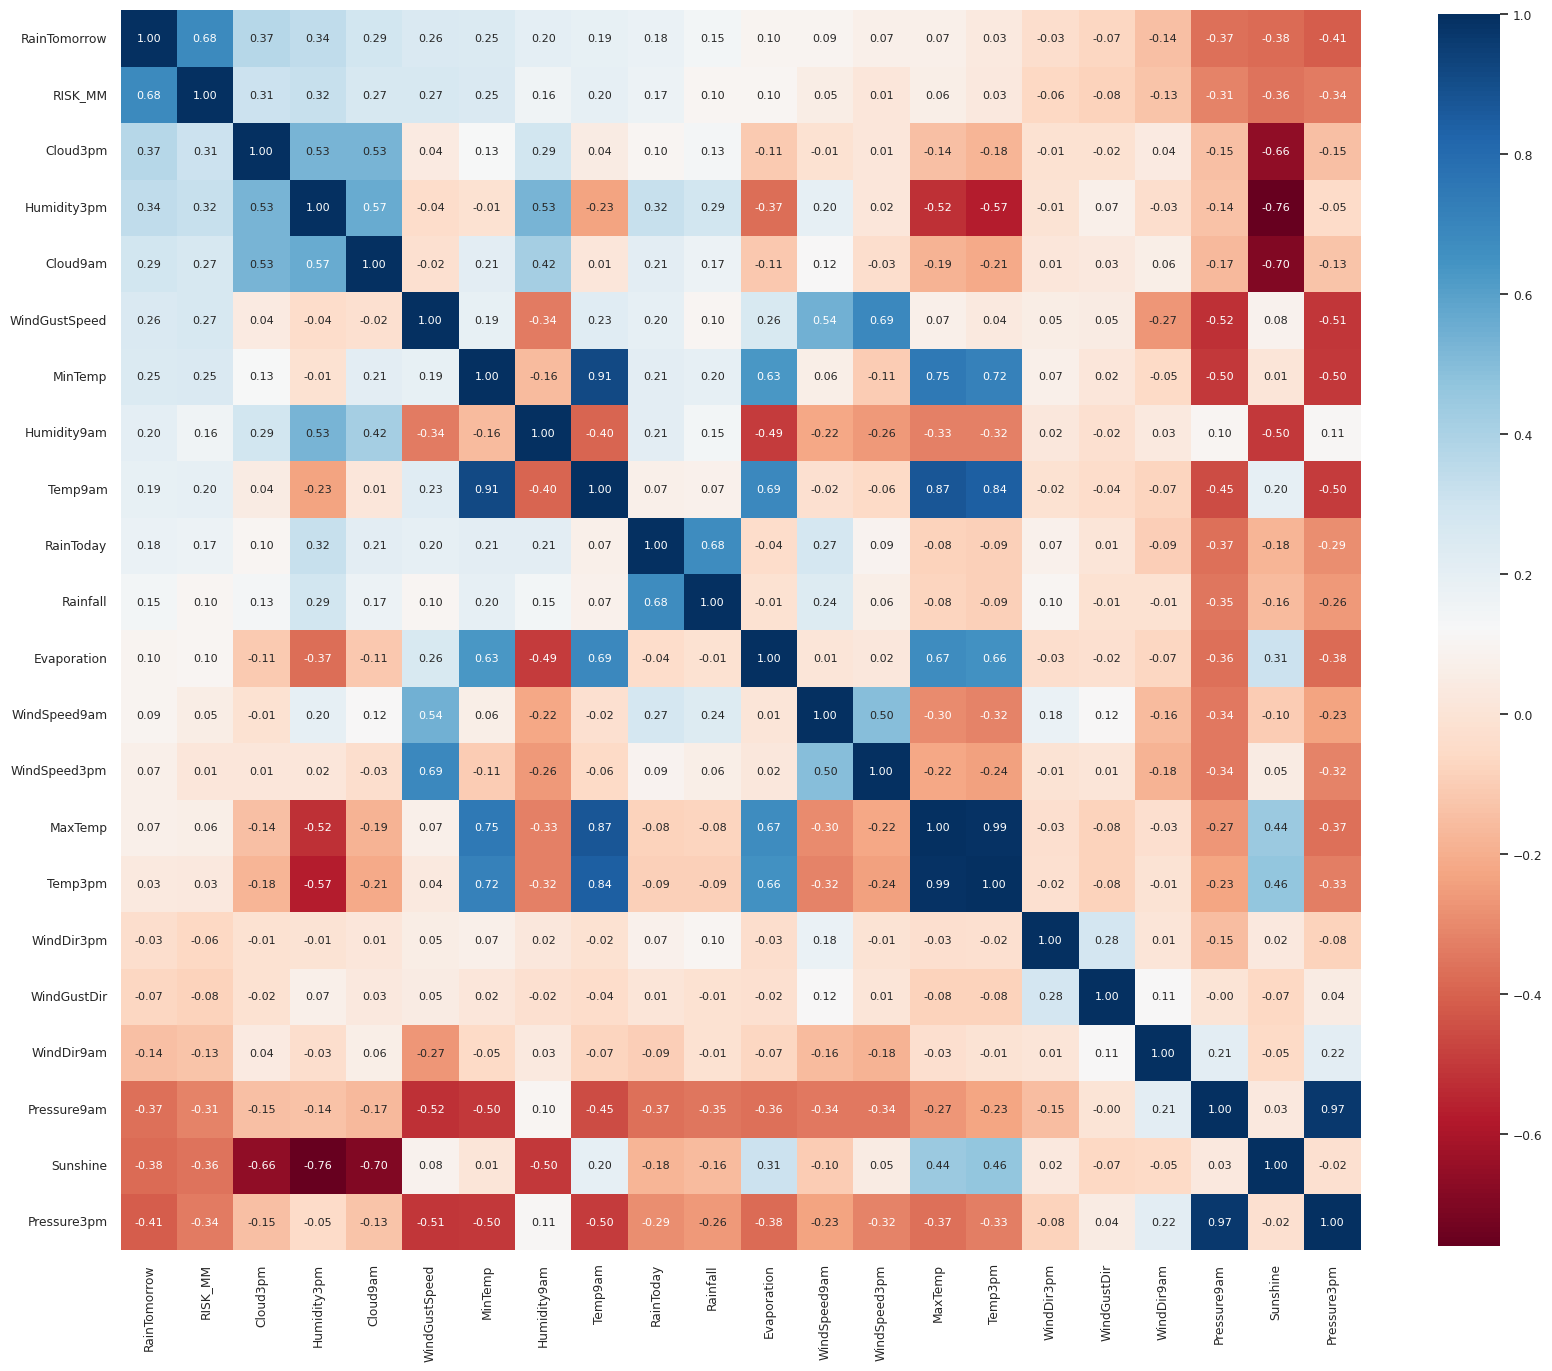

In [ ]:
plt.figure(figsize=(20,20))
k=22
cols = corrmat.nlargest(k, 'RainTomorrow')['RainTomorrow'].index
cm = np.corrcoef(d[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=True, cbar_kws={"shrink": .8}, annot=True, square=True, fmt='.2f', annot_kws={'size': 8},
                 yticklabels=cols.values, xticklabels=cols.values, cmap="RdBu")
plt.show()

In [ ]:
features_1 = d.drop(['RainTomorrow'], axis=1)
features_1.shape

(328, 21)

In [ ]:
target_1 = d['RainTomorrow']
target_1.shape

(328,)

In [ ]:
x=features_1
y=target_1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(262, 21)
(66, 21)
(262,)
(66,)


In [ ]:
start_time = time.time()

# 3. Use KNN model
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train, y_train)

end_time = time.time()
execution_time = end_time - start_time
print(f"\nTime taken for execution: {execution_time:.2f} seconds")


Time taken for execution: 0.00 seconds


In [ ]:
y_predict_knn = knn_model.predict(x_test)
y_predict_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

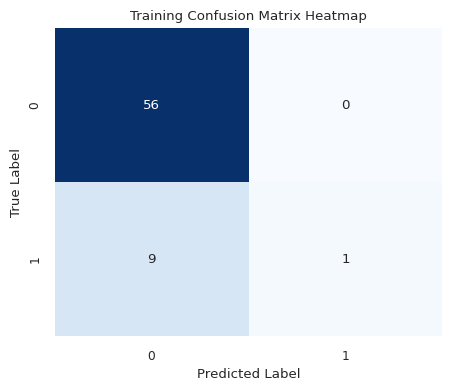


Training Classification Report of KNN model:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        56
           1       1.00      0.10      0.18        10

    accuracy                           0.86        66
   macro avg       0.93      0.55      0.55        66
weighted avg       0.88      0.86      0.81        66

Accuracy: 86.4 %

Time taken for execution: -101.90 seconds


In [ ]:
# Don't execute Now.
start_time = time.time()
# 4. Print the training confusion matrix
y_train_pred = knn_model.predict(x_train)
conf_matrix_train = confusion_matrix(y_test, y_predict_knn)

# Plot the training confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Training Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the training classification report
print("\nTraining Classification Report of KNN model:")
print(classification_report(y_test, y_predict_knn))

execution_time = end_time - start_time
print('Accuracy:',np.round(accuracy_score(y_test, y_predict_knn),3)*100,'%')
print(f"\nTime taken for execution: {execution_time:.2f} seconds")

#Random Forest

In [ ]:
start_time = time.time()

# 3. Use Random Forest model
rf_model = RandomForestClassifier(n_estimators=20, max_depth= 10, random_state=42)
rf_model.fit(x_train, y_train)

end_time = time.time()
execution_time = end_time - start_time
print(f"\nTime taken for execution: {execution_time:.2f} seconds")


Time taken for execution: 0.05 seconds


In [ ]:
y_predict_rf = rf_model.predict(x_test)
y_predict_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

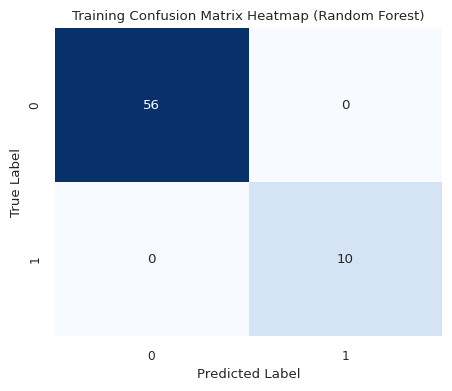


Training Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        10

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66

Accuracy: 100.0 %

Time taken for execution: 0.20 seconds


In [ ]:
start_time = time.time()
# 4. Print the training confusion matrix
y_train_pred_rf = rf_model.predict(x_train)
conf_matrix_train_rf = confusion_matrix(y_test, y_predict_rf)
# Plot the training confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_train_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Training Confusion Matrix Heatmap (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
# Print the training classification report
print("\nTraining Classification Report of Random Forest:")
print(classification_report(y_test, y_predict_rf))

end_time = time.time()
execution_time = end_time - start_time
print('Accuracy:',np.round(accuracy_score(y_test,y_predict_rf),3)*100,'%')
print(f"\nTime taken for execution: {execution_time:.2f} seconds")

#Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predict_lr = lr.predict(x_test)
y_predict_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

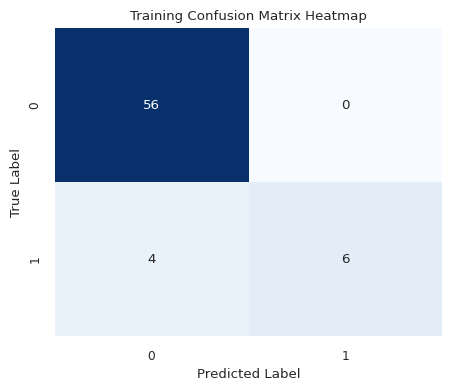


Training Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       1.00      0.60      0.75        10

    accuracy                           0.94        66
   macro avg       0.97      0.80      0.86        66
weighted avg       0.94      0.94      0.93        66

Accuracy: 93.89999999999999 %

Time taken for execution: -142.83 seconds


In [ ]:
# Don't execute Now.
start_time = time.time()
# 4. Print the training confusion matrix
conf_matrix_train = confusion_matrix(y_test, y_predict_lr)

# Plot the training confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Training Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the training classification report
print("\nTraining Classification Report of Logistic Regression:")
print(classification_report(y_test, y_predict_lr))

execution_time = end_time - start_time
print('Accuracy:',np.round(accuracy_score(y_test, y_predict_lr),3)*100,'%')
print(f"\nTime taken for execution: {execution_time:.2f} seconds")